<a href="https://colab.research.google.com/github/phatnguyenthuan1502/Remaining-Useful-Life-Assessment-of-Bypass-and-Blocking-Diodes-in-Photovoltaic-Arrays/blob/main/WT_CNN_GRU_time_series_analysis_(data_1)(split_0)(WT_use_cA_and_cD)(WT_1_level)(2_CNN_model)(CNN_uses_LeakyReLU)(1_fully_connected_layers)(find_LC_from_temp_and_Nf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
book = pd.ExcelFile('Data for ML TT-DB1.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

temp = sheet.loc[:,"Temperature"]
nf = sheet.loc[:,"Nf"]
lc = sheet.loc[:,"LC"]


print(pd.Series(temp).array)
print(pd.Series(nf).array)
print(pd.Series(lc).array)

<PandasArray>
[38, 41, 44, 47, 50, 53, 56, 59, 62, 65,
 ...
 47, 50, 38, 40, 43, 46, 49, 52, 54, 57]
Length: 496, dtype: int64
<PandasArray>
[64122.1205326926,  45405.534205958, 40242.2001229581, 56696.4383369348,
 51580.0130808749, 79424.5393719238,  58679.525782504, 53399.3097453367,
 58091.7058622165, 49809.7792307447,
 ...
 95878.2837855266, 43108.4340095735,      73450.45307,      181239.2144,
      129105.2526,      140228.3196,      155480.7897,      76477.72731,
      41743.17516,      47234.45108]
Length: 496, dtype: float64
<PandasArray>
[0.000124761937589403, 6.60712411485371e-05, 4.96990719664704e-05,
 0.000123464545663354, 0.000116324127149644, 0.000163677373552329,
 0.000136333753439863, 0.000131087836778851, 0.000154927452489456,
 0.000140534652192943,
 ...
 0.000187738028772655, 9.27892671562061e-05,             8.17e-05,
          0.000193115,           0.00019364,          0.000199674,
          0.000205813,           0.00018306,             4.79e-05,
          0.0001

In [5]:
temp = pd.Series(temp).array
nf = pd.Series(nf).array
lc = pd.Series(lc).array

print(temp)
print(nf)
print(lc)

<PandasArray>
[38, 41, 44, 47, 50, 53, 56, 59, 62, 65,
 ...
 47, 50, 38, 40, 43, 46, 49, 52, 54, 57]
Length: 496, dtype: int64
<PandasArray>
[64122.1205326926,  45405.534205958, 40242.2001229581, 56696.4383369348,
 51580.0130808749, 79424.5393719238,  58679.525782504, 53399.3097453367,
 58091.7058622165, 49809.7792307447,
 ...
 95878.2837855266, 43108.4340095735,      73450.45307,      181239.2144,
      129105.2526,      140228.3196,      155480.7897,      76477.72731,
      41743.17516,      47234.45108]
Length: 496, dtype: float64
<PandasArray>
[0.000124761937589403, 6.60712411485371e-05, 4.96990719664704e-05,
 0.000123464545663354, 0.000116324127149644, 0.000163677373552329,
 0.000136333753439863, 0.000131087836778851, 0.000154927452489456,
 0.000140534652192943,
 ...
 0.000187738028772655, 9.27892671562061e-05,             8.17e-05,
          0.000193115,           0.00019364,          0.000199674,
          0.000205813,           0.00018306,             4.79e-05,
          0.0001

In [6]:
'''temp_new = []
for str_temp in temp:
  str_new = str_temp.replace("TT ","")
  str_new = str_new.replace("'","")
  temp_new.append(int(str_new))

AttributeError: ignored

In [10]:
temp_new = temp

In [11]:
temp_new

<PandasArray>
[38, 41, 44, 47, 50, 53, 56, 59, 62, 65,
 ...
 47, 50, 38, 40, 43, 46, 49, 52, 54, 57]
Length: 496, dtype: int64

In [12]:
nf = nf/1000

print(nf)

<PandasArray>
[ 64.1221205326926,   45.405534205958,  40.2422001229581,  56.6964383369348,
  51.5800130808749,  79.4245393719238,   58.679525782504,  53.3993097453367,
  58.0917058622165,  49.8097792307447,
 ...
 95.87828378552659,  43.1084340095735, 73.45045307000001,       181.2392144,
       129.1052526,       140.2283196,       155.4807897,       76.47772731,
       41.74317516,       47.23445108]
Length: 496, dtype: float64


In [13]:
lc = lc*1000000

print(lc)

<PandasArray>
[124.76193758940299,   66.0712411485371,   49.6990719664704,
 123.46454566335399,   116.324127149644,   163.677373552329,
   136.333753439863,   131.087836778851,   154.927452489456,
   140.534652192943,
 ...
   187.738028772655,  92.78926715620611,  81.69999999999999,
            193.115,             193.64,            199.674,
 205.81300000000002,             183.06,               47.9,
            127.026]
Length: 496, dtype: float64


In [14]:
temp_new = np.array(temp_new)
nf = np.array(nf)
lc = np.array(lc)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from numpy import array
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import tensorflow as tf
import pywt

In [16]:
def get_wave(data, wavelet, num_level, mode):
  return pywt.wavedec(data, wavelet, level = num_level, mode = mode)

In [17]:
wavelet = 'db1'
mode = 'periodic'
num_level = 1

In [18]:
a = [1,2,3,4,5,6,7,8,9]
get_wave(a, wavelet, num_level, mode)

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172,  7.07106781]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678,  5.65685425])]

In [19]:
a = [1,2]
get_wave(a, wavelet, num_level, mode)

[array([2.12132034]), array([-0.70710678])]

In [20]:
a = [3,4]
get_wave(a, wavelet, num_level, mode)

[array([4.94974747]), array([-0.70710678])]

In [21]:
a = [5,6]
get_wave(a, wavelet, num_level, mode)

[array([7.77817459]), array([-0.70710678])]

In [22]:
a = [7,8]
get_wave(a, wavelet, num_level, mode)

[array([10.60660172]), array([-0.70710678])]

In [23]:
a = [9,1]
get_wave(a, wavelet, num_level, mode)

[array([7.07106781]), array([5.65685425])]

In [24]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [25]:
# define input sequence
in_seq1 = temp_new
in_seq2 = nf
out_seq = lc
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(496, 1, 2) (496,)
[[38.         64.12212053]] 124.76193758940299
[[41.         45.40553421]] 66.0712411485371
[[44.         40.24220012]] 49.6990719664704
[[47.         56.69643834]] 123.46454566335399
[[50.         51.58001308]] 116.324127149644
[[53.         79.42453937]] 163.677373552329
[[56.         58.67952578]] 136.333753439863
[[59.         53.39930975]] 131.087836778851
[[62.         58.09170586]] 154.927452489456
[[65.         49.80977923]] 140.534652192943
[[68.        62.1998189]] 176.849389509074
[[71.         60.81959318]] 180.862768460356
[[74.        52.9162189]] 170.080179325084
[[77.         48.68946234]] 164.30659972995798
[[80.         49.83334895]] 180.601950080319
[[83.         58.21772448]] 206.122793474567
[[86.         52.33375181]] 191.081274595023
[[89.        50.1046016]] 199.58246709529
[[92.         52.23603662]] 210.582592254958
[[95.         31.38981589]] 95.5723987348091
[[40.         80.85676782]] 160.778130892363
[[43.         74.57622295]] 160.90919

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False)

In [27]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False)

In [28]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

356
356
90
90
50
50


In [29]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [30]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [31]:
for i in range(len(X_train)):
	print(X_train[i], y_train[i])

[[38.      64.12212]] 124.76194
[[41.       45.405533]] 66.07124
[[44.     40.2422]] 49.699074
[[47.       56.696438]] 123.46455
[[50.       51.580013]] 116.32413
[[53.      79.42454]] 163.67737
[[56.       58.679527]] 136.33376
[[59.      53.39931]] 131.08783
[[62.       58.091705]] 154.92746
[[65.      49.80978]] 140.53465
[[68.       62.199818]] 176.8494
[[71.      60.81959]] 180.86276
[[74.       52.916218]] 170.08018
[[77.      48.68946]] 164.3066
[[80.       49.833347]] 180.60194
[[83.       58.217724]] 206.12279
[[86.      52.33375]] 191.08127
[[89.       50.104603]] 199.58247
[[92.      52.23604]] 210.5826
[[95.       31.389816]] 95.572395
[[40.       80.856766]] 160.77814
[[43.       74.576225]] 160.9092
[[46.     97.3079]] 184.97984
[[49.       95.139465]] 189.19594
[[52.      55.17172]] 145.00183
[[55.      53.93594]] 148.3241
[[58.      77.80267]] 192.79543
[[61.      68.86792]] 188.76714
[[64.      47.62317]] 146.98727
[[67.       46.703487]] 149.88174
[[70.       48.73959

In [32]:
for i in range(len(X_val)):
	print(X_val[i], y_val[i])

[[68.      60.82947]] 180.83339
[[71.      61.26705]] 195.86385
[[74.     56.8658]] 193.4379
[[77.       59.056805]] 203.1942
[[80.      52.93275]] 188.91896
[[83.      61.40306]] 211.71582
[[86.      40.91943]] 146.62961
[[36.      59.01265]] 118.619
[[ 39.      134.68437]] 185.619
[[ 42.      220.46902]] 195.039
[[ 45.      216.19136]] 198.898
[[ 48.      197.65224]] 202.376
[[ 51.      247.35168]] 206.184
[[ 54.      212.17644]] 212.088
[[ 57.      207.81363]] 216.54
[[ 60.      208.36545]] 220.766
[[ 63.      191.06317]] 225.056
[[ 66.       110.946724]] 225.333
[[69.      91.26562]] 219.141
[[72.       85.986694]] 220.964
[[75.      81.27869]] 221.46
[[78.      82.85487]] 229.317
[[81.       84.753365]] 235.979
[[84.       86.381485]] 243.108
[[87.      81.59031]] 245.127
[[90.       64.341934]] 233.129
[[93.       51.825092]] 212.252
[[96.       51.077026]] 215.361
[[99.       47.571247]] 210.211
[[102.       49.31492]] 223.056
[[105.       33.47338]] 149.372
[[ 38.      147.1878

In [33]:
train_temp_wave = np.array(get_wave(X_train.T[0][0], wavelet, num_level, mode))
train_nf_wave = np.array(get_wave(X_train.T[1][0], wavelet, num_level, mode))
train_lc_wave = np.array(get_wave(y_train, wavelet, num_level, mode))
val_temp_wave = np.array(get_wave(X_val.T[0][0], wavelet, num_level, mode))
val_nf_wave = np.array(get_wave(X_val.T[1][0], wavelet, num_level, mode))
val_lc_wave = np.array(get_wave(y_val, wavelet, num_level, mode))
test_temp_wave = np.array(get_wave(X_test.T[0][0], wavelet, num_level, mode))
test_nf_wave = np.array(get_wave(X_test.T[1][0], wavelet, num_level, mode))
test_lc_wave = np.array(get_wave(y_test, wavelet, num_level, mode))

In [34]:
train_temp_wave_new = np.concatenate((train_temp_wave[0], train_temp_wave[1]))
train_nf_wave_new = np.concatenate((train_nf_wave[0], train_nf_wave[1]))
train_lc_wave_new = np.concatenate((train_lc_wave[0], train_lc_wave[1]))
val_temp_wave_new = np.concatenate((val_temp_wave[0], val_temp_wave[1]))
val_nf_wave_new = np.concatenate((val_nf_wave[0], val_nf_wave[1]))
val_lc_wave_new = np.concatenate((val_lc_wave[0], val_lc_wave[1]))
test_temp_wave_new = np.concatenate((test_temp_wave[0], test_temp_wave[1]))
test_nf_wave_new = np.concatenate((test_nf_wave[0], test_nf_wave[1]))
test_lc_wave_new = np.concatenate((test_lc_wave[0], test_lc_wave[1]))

In [35]:
hstack((train_temp_wave_new, train_nf_wave_new, train_lc_wave_new))

array([ 55.861435,  64.34671 ,  72.832   , ...,  18.796486, -82.51247 ,
         4.155182], dtype=float32)

In [36]:
#TRAIN_SET
# define input sequence
in_seq1 = train_temp_wave_new
in_seq2 = train_nf_wave_new
out_seq = train_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_train = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_train_wave, y_train_wave = split_sequences(dataset_train, n_steps)
print(X_train_wave.shape, y_train_wave.shape)
# summarize the data
for i in range(len(X_train_wave)):
	print(X_train_wave[i], y_train_wave[i])

(356, 1, 2) (356,)
[[55.861435 77.44775 ]] 134.93944
[[64.34671 68.54597]] 122.445175
[[72.832  92.6342]] 197.99095
[[81.317276 79.25171 ]] 189.09561
[[89.80256 76.29787]] 208.92325
[[98.28784  86.987854]] 252.94069
[[106.77312  71.84606]] 236.44714
[[115.25841  76.40364]] 273.4557
[[123.74368  72.43485]] 276.24097
[[132.22897  59.13241]] 216.48425
[[ 58.689865 109.907715]] 227.46729
[[ 67.17514 136.08084]] 264.5822
[[75.66042  77.150764]] 207.41275
[[ 84.145706 103.71177 ]] 269.80548
[[92.63098 66.69902]] 209.91809
[[101.11627  62.20658]] 206.1773
[[109.60155  58.34227]] 204.2919
[[ 57.27565 122.29229]] 226.47993
[[ 65.760925 176.25632 ]] 266.6252
[[ 74.246216 159.3281  ]] 276.186
[[ 82.73149 149.79141]] 287.12634
[[ 91.216774 146.4639  ]] 300.4447
[[ 99.70206 140.65154]] 312.86432
[[108.18733 129.93512]] 323.06436
[[116.67262 133.93253]] 343.46368
[[125.1579 133.5892]] 351.55368
[[133.64319 121.73201]] 361.47723
[[142.12846  96.9994 ]] 359.19537
[[150.61374   60.910023]] 294.62027
[[

In [37]:
#VAL_SET
# define input sequence
in_seq1 = val_temp_wave_new
in_seq2 = val_nf_wave_new
out_seq = val_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_val = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_val_wave, y_val_wave = split_sequences(dataset_val, n_steps)
print(X_val_wave.shape, y_val_wave.shape)
# summarize the data
for i in range(len(X_val_wave)):
	print(X_val_wave[i], y_val_wave[i])

(90, 1, 2) (90,)
[[98.28784 86.33528]] 266.36517
[[106.77312  81.96966]] 280.46124
[[115.25841   80.847626]] 283.29156
[[86.26703 70.66265]] 187.55908
[[ 57.27565 251.13138]] 269.16583
[[ 65.760925 292.6316  ]] 283.74356
[[ 74.246216 324.93546 ]] 295.76297
[[ 82.73149 294.28305]] 309.22205
[[ 91.216774 213.55325 ]] 318.4731
[[ 99.70206 125.33631]] 311.20123
[[108.18733 116.05995]] 318.7475
[[116.67262  121.010605]] 338.7657
[[125.1579   103.189674]] 338.17804
[[133.64319  72.76279]] 302.36804
[[142.12846   68.508865]] 306.36603
[[101.116264 127.746765]] 201.70432
[[ 60.104073 278.59082 ]] 262.95178
[[ 68.589355 278.6302  ]] 283.43668
[[ 77.07464 314.60168]] 302.1814
[[ 85.55992 286.114  ]] 314.52252
[[ 94.0452  288.07526]] 326.4903
[[102.53049 265.31113]] 339.4148
[[111.01576 244.16785]] 352.33716
[[119.501045 283.5053  ]] 363.17572
[[127.98633 244.19055]] 377.42108
[[136.4716  240.37811]] 382.91812
[[144.95688 162.57022]] 377.44226
[[153.44217 170.80807]] 398.13013
[[161.92746  86.562

In [38]:
#TEST_SET
# define input sequence
in_seq1 = test_temp_wave_new
in_seq2 = test_nf_wave_new
out_seq = test_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_test = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_test_wave, y_test_wave = split_sequences(dataset_test, n_steps)
print(X_test_wave.shape, y_test_wave.shape)
# summarize the data
for i in range(len(X_test_wave)):
	print(X_test_wave[i], y_test_wave[i])

(50, 1, 2) (50,)
[[ 67.17514 475.79742]] 279.93488
[[ 75.66042 365.55344]] 296.04382
[[ 84.145706 252.09448 ]] 313.26312
[[ 92.63098 250.55875]] 323.4195
[[101.11627 265.05154]] 335.857
[[109.60155 246.01297]] 349.34766
[[118.08683 125.57472]] 313.84387
[[ 53.740112 104.04686 ]] 137.67157
[[ 61.518288 185.38309 ]] 216.3082
[[ 70.00357 257.73752]] 291.26294
[[ 78.488846 239.52664 ]] 304.681
[[ 86.97414 225.07974]] 306.54846
[[ 95.45941 246.85825]] 320.01743
[[103.944695 253.15259 ]] 332.04675
[[112.42998 209.77194]] 343.30954
[[120.91525 140.47748]] 348.2027
[[129.40054  107.786514]] 333.76712
[[137.88582  67.41854]] 251.94073
[[98.99495 73.7915 ]] 182.4241
[[ 60.104073 128.07391 ]] 248.97137
[[68.589355 98.27844 ]] 198.36275
[[ 55.154327 180.09279 ]] 194.32355
[[ 62.932503 190.4476  ]] 278.115
[[ 71.417786 164.01944 ]] 274.97473
[[78.488846 62.91668 ]] 123.69136
[[-2.1213188 40.26709  ]] -4.775482
[[-2.1213226 46.386627 ]] -4.739319
[[-2.1213226 -5.3586655]] -5.2414093
[[-2.1213188 11.

In [39]:
def get_cA(wave, num_level):
  return(wave[:len(wave)//(2*num_level)])

def get_cD(wave, level, num_level):
  i = 0
  temp_wave = wave
  while(i<level):
    cD = temp_wave[len(temp_wave)//2:]
    temp_wave = temp_wave[:len(temp_wave)//2]
    i = i + 1
  return cD

In [40]:
get_cA(X_train_wave, num_level)

array([[[ 55.861435,  77.44775 ]],

       [[ 64.34671 ,  68.54597 ]],

       [[ 72.832   ,  92.6342  ]],

       [[ 81.317276,  79.25171 ]],

       [[ 89.80256 ,  76.29787 ]],

       [[ 98.28784 ,  86.987854]],

       [[106.77312 ,  71.84606 ]],

       [[115.25841 ,  76.40364 ]],

       [[123.74368 ,  72.43485 ]],

       [[132.22897 ,  59.13241 ]],

       [[ 58.689865, 109.907715]],

       [[ 67.17514 , 136.08084 ]],

       [[ 75.66042 ,  77.150764]],

       [[ 84.145706, 103.71177 ]],

       [[ 92.63098 ,  66.69902 ]],

       [[101.11627 ,  62.20658 ]],

       [[109.60155 ,  58.34227 ]],

       [[ 57.27565 , 122.29229 ]],

       [[ 65.760925, 176.25632 ]],

       [[ 74.246216, 159.3281  ]],

       [[ 82.73149 , 149.79141 ]],

       [[ 91.216774, 146.4639  ]],

       [[ 99.70206 , 140.65154 ]],

       [[108.18733 , 129.93512 ]],

       [[116.67262 , 133.93253 ]],

       [[125.1579  , 133.5892  ]],

       [[133.64319 , 121.73201 ]],

       [[142.12846 ,  96.999

In [41]:
get_cD(X_train_wave, 1, num_level)

array([[[ -2.1213188 ,  13.234627  ]],

       [[ -2.1213188 , -11.634903  ]],

       [[ -2.1213188 , -19.689053  ]],

       [[ -2.1213188 ,   3.733677  ]],

       [[ -2.1213226 ,   5.856205  ]],

       [[ -2.1213226 ,   0.9759674 ]],

       [[ -2.1213188 ,   2.9887695 ]],

       [[ -2.1213188 ,  -5.92865   ]],

       [[ -2.1213188 ,   1.5762482 ]],

       [[ -2.121315  ,  14.740503  ]],

       [[ -2.1213207 ,   4.4410133 ]],

       [[ -2.1213188 ,   1.5333176 ]],

       [[ -2.1213226 ,   0.8738251 ]],

       [[ -2.1213226 ,   6.3178253 ]],

       [[ -2.1213188 ,   0.6503105 ]],

       [[ -2.1213188 ,   6.721609  ]],

       [[ -2.1213188 ,   4.0081406 ]],

       [[ -2.1213207 , -16.6726    ]],

       [[ -2.1213188 ,  18.554008  ]],

       [[ -2.1213188 ,   1.5540237 ]],

       [[ -2.1213226 ,   4.526787  ]],

       [[ -2.1213226 ,   1.4418106 ]],

       [[ -2.1213188 ,   6.7145386 ]],

       [[ -2.1213188 ,  -3.8069    ]],

       [[ -2.1213188 ,  -0.59310913]],



In [42]:
from keras import backend as K
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

In [43]:
X_train_wave.shape

(356, 1, 2)

In [44]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model_cA = Sequential()
model_cA.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model_cA.add(MaxPooling1D(pool_size=1))
#model_cA.add(LSTM(4,return_sequences=True))
model_cA.add(GRU(50, input_shape=(1, n_features)))
model_cA.add(Flatten())
model_cA.add(Dense(40, activation='relu'))
model_cA.add(Dense(2))
model_cA.add(Dense(1))
model_cA.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [45]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [46]:
# fit model
history_cA = model_cA.fit(get_cA(X_train_wave, num_level), get_cA(y_train_wave, num_level), epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(get_cA(X_val_wave, num_level), get_cA(y_val_wave, num_level)))

Epoch 1/2000
6/6 - 3s - loss: 75821.6328 - mse: 75821.6328 - mae: 269.5129 - rmse: 275.3573 - rmspe: 0.9935 - mape: 99.3766 - val_loss: 90515.2188 - val_mse: 90515.2188 - val_mae: 296.7701 - val_rmse: 300.8575 - val_rmspe: 0.9916 - val_mape: 99.1581 - 3s/epoch - 515ms/step
Epoch 2/2000
6/6 - 0s - loss: 74787.5938 - mse: 74787.5938 - mae: 267.5818 - rmse: 273.4732 - rmspe: 0.9860 - mape: 98.6228 - val_loss: 89411.4297 - val_mse: 89411.4297 - val_mae: 294.9084 - val_rmse: 299.0174 - val_rmspe: 0.9850 - val_mape: 98.5179 - 74ms/epoch - 12ms/step
Epoch 3/2000
6/6 - 0s - loss: 73887.6328 - mse: 73887.6328 - mae: 265.8927 - rmse: 271.8228 - rmspe: 0.9794 - mape: 97.9677 - val_loss: 88300.2578 - val_mse: 88300.2578 - val_mae: 293.0197 - val_rmse: 297.1536 - val_rmspe: 0.9782 - val_mape: 97.8695 - 40ms/epoch - 7ms/step
Epoch 4/2000
6/6 - 0s - loss: 72957.5234 - mse: 72957.5234 - mae: 264.1521 - rmse: 270.1065 - rmspe: 0.9726 - mape: 97.2966 - val_loss: 87280.3359 - val_mse: 87280.3359 - val_ma

In [47]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model_cD = Sequential()
model_cD.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model_cD.add(MaxPooling1D(pool_size=1))
#model_cD.add(LSTM(4,return_sequences=True))
model_cD.add(GRU(50, input_shape=(1, n_features)))
model_cD.add(Flatten())
model_cD.add(Dense(40, activation='relu'))
model_cD.add(Dense(2))
model_cD.add(Dense(1))
model_cD.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [48]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [49]:
# fit model
history_cD = model_cD.fit(get_cD(X_train_wave, 1, num_level), get_cD(y_train_wave, 1, num_level), epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(get_cD(X_val_wave, 1, num_level), get_cD(y_val_wave, 1, num_level)))

Epoch 1/2000
6/6 - 3s - loss: 593.4740 - mse: 593.4740 - mae: 14.9187 - rmse: 24.3613 - rmspe: 1.1592 - mape: 107.0945 - val_loss: 207.7726 - val_mse: 207.7726 - val_mae: 9.0702 - val_rmse: 14.4143 - val_rmspe: 1.4247 - val_mape: 120.7805 - 3s/epoch - 454ms/step
Epoch 2/2000
6/6 - 0s - loss: 572.0530 - mse: 572.0530 - mae: 14.5616 - rmse: 23.9176 - rmspe: 1.6179 - mape: 118.2976 - val_loss: 202.4724 - val_mse: 202.4724 - val_mae: 9.1229 - val_rmse: 14.2293 - val_rmspe: 1.9531 - val_mape: 136.1156 - 58ms/epoch - 10ms/step
Epoch 3/2000
6/6 - 0s - loss: 554.4673 - mse: 554.4673 - mae: 14.3291 - rmse: 23.5471 - rmspe: 2.3304 - mape: 137.4186 - val_loss: 198.9239 - val_mse: 198.9239 - val_mae: 9.2732 - val_rmse: 14.1040 - val_rmspe: 2.6663 - val_mape: 163.8551 - 40ms/epoch - 7ms/step
Epoch 4/2000
6/6 - 0s - loss: 538.8348 - mse: 538.8348 - mae: 14.1315 - rmse: 23.2128 - rmspe: 2.8190 - mape: 158.1312 - val_loss: 195.6263 - val_mse: 195.6263 - val_mae: 9.3932 - val_rmse: 13.9866 - val_rmspe:

In [50]:
import matplotlib.pyplot as plt
import math

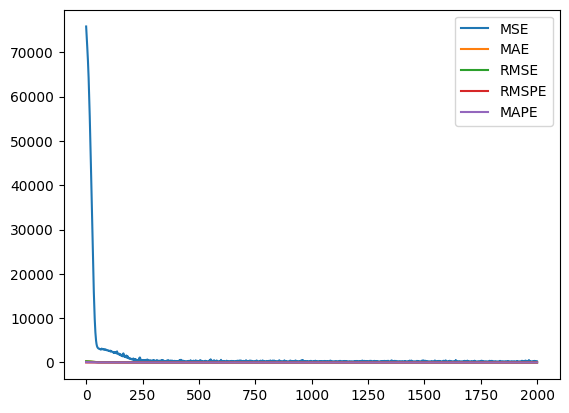

In [51]:
plt.plot(history_cA.history['mse'])
plt.plot(history_cA.history['mae'])
plt.plot(history_cA.history['rmse'])
plt.plot(history_cA.history['rmspe'])
plt.plot(history_cA.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

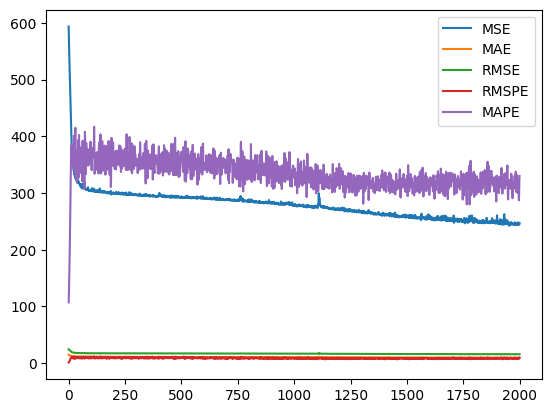

In [52]:
plt.plot(history_cD.history['mse'])
plt.plot(history_cD.history['mae'])
plt.plot(history_cD.history['rmse'])
plt.plot(history_cD.history['rmspe'])
plt.plot(history_cD.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

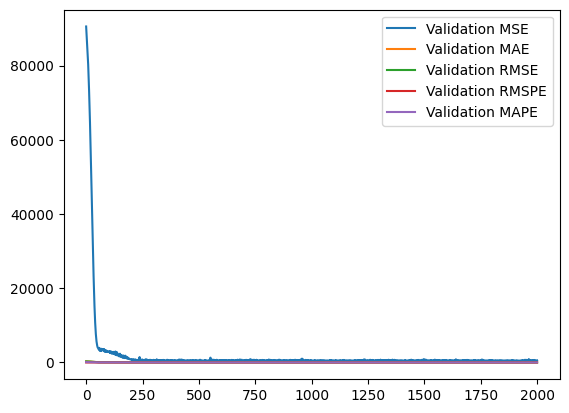

In [53]:
plt.plot(history_cA.history['val_mse'])
plt.plot(history_cA.history['val_mae'])
plt.plot(history_cA.history['val_rmse'])
plt.plot(history_cA.history['val_rmspe'])
plt.plot(history_cA.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

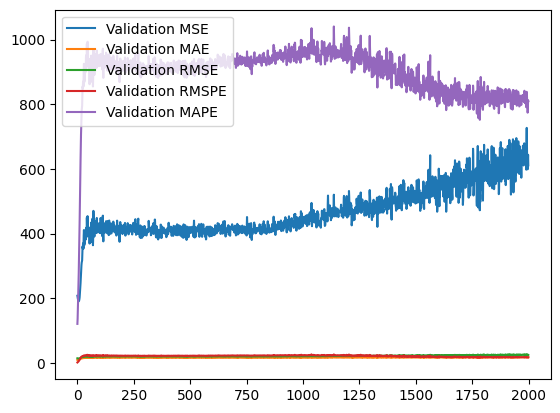

In [54]:
plt.plot(history_cD.history['val_mse'])
plt.plot(history_cD.history['val_mae'])
plt.plot(history_cD.history['val_rmse'])
plt.plot(history_cD.history['val_rmspe'])
plt.plot(history_cD.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

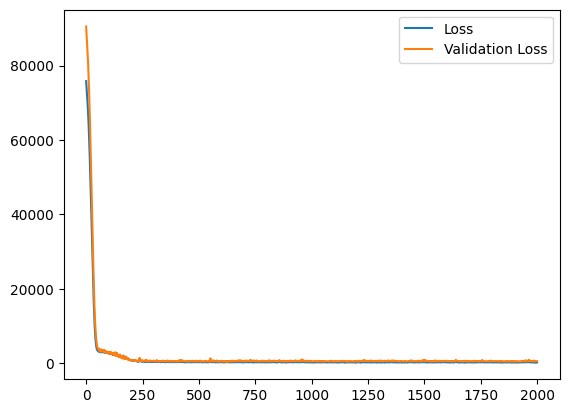

In [55]:
plt.plot(history_cA.history['loss'])
plt.plot(history_cA.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

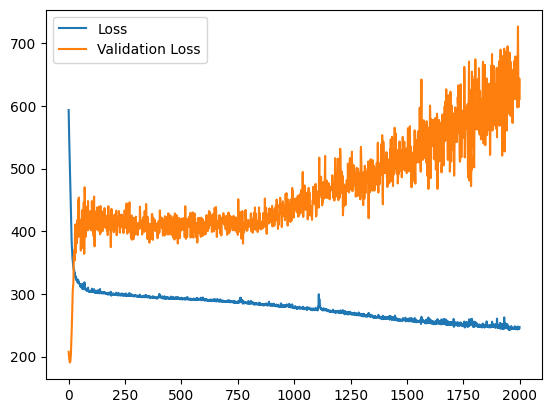

In [56]:
plt.plot(history_cD.history['loss'])
plt.plot(history_cD.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

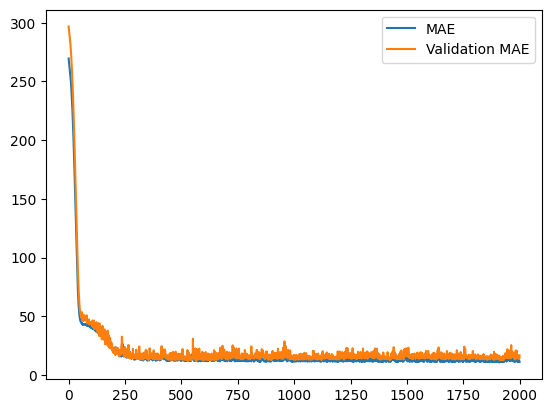

In [57]:
plt.plot(history_cA.history['mae'])
plt.plot(history_cA.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

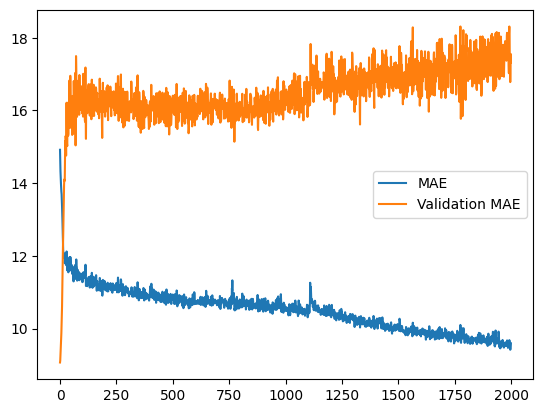

In [58]:
plt.plot(history_cD.history['mae'])
plt.plot(history_cD.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

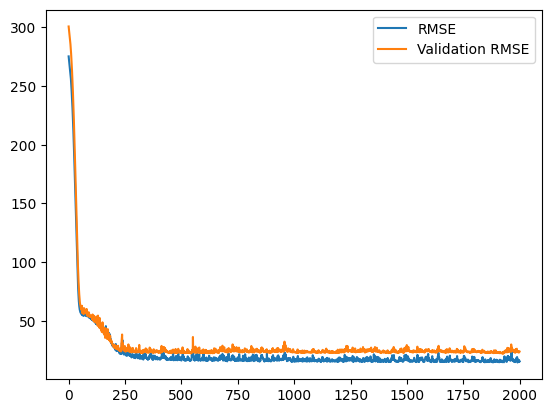

In [59]:
plt.plot(history_cA.history['rmse'])
plt.plot(history_cA.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

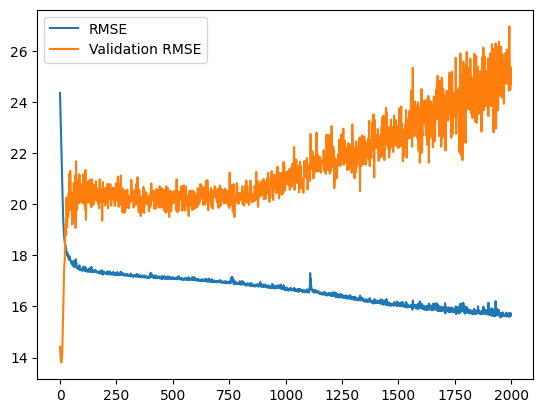

In [60]:
plt.plot(history_cD.history['rmse'])
plt.plot(history_cD.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

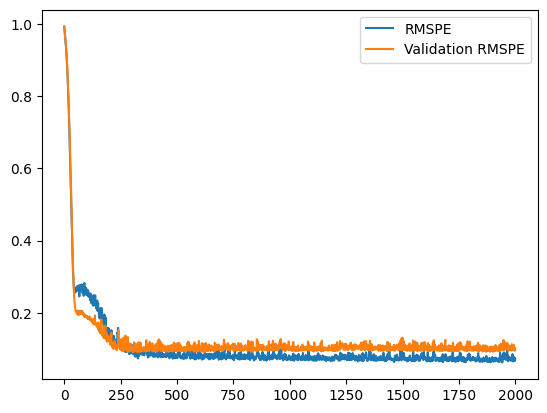

In [61]:
plt.plot(history_cA.history['rmspe'])
plt.plot(history_cA.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

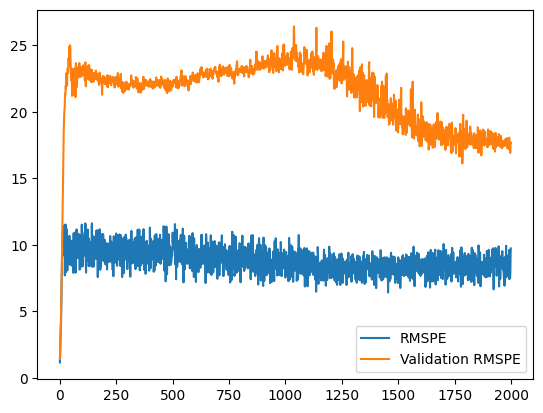

In [62]:
plt.plot(history_cD.history['rmspe'])
plt.plot(history_cD.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

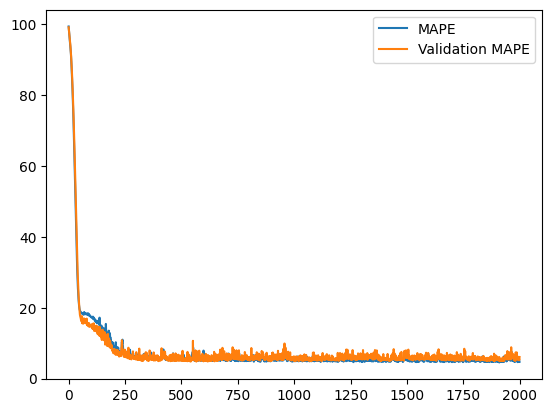

In [63]:
plt.plot(history_cA.history['mape'])
plt.plot(history_cA.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

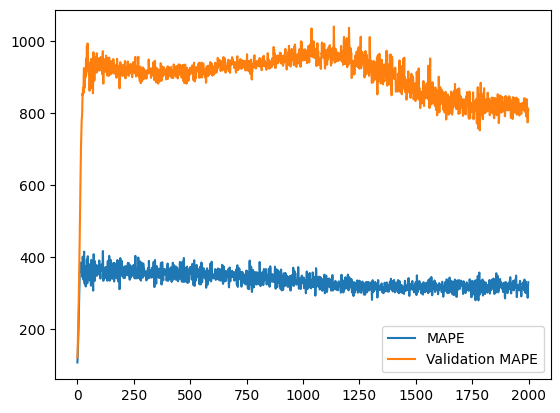

In [64]:
plt.plot(history_cD.history['mape'])
plt.plot(history_cD.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

In [65]:
# predict all
def predict_all(model, X_test):
  preds = list()
  for x in X_test:
    x = x.reshape((1, n_steps, n_features))
    preds.extend(model.predict(x, verbose=0)[0])
  return preds

In [66]:
preds_wave_cA = predict_all(model_cA, get_cA(X_test_wave, num_level))
print(preds_wave_cA)

[266.35754, 282.60995, 301.73087, 311.45724, 315.9275, 319.04803, 340.24805, 162.64105, 266.36218, 279.534, 295.9377, 308.1023, 313.77606, 317.5471, 338.3628, 332.10757, 331.62433, 269.3621, 216.41132, 211.88269, 213.0647, 250.29439, 270.10718, 271.70007, 133.9201]


In [67]:
for i in range(len(get_cA(y_test_wave, num_level))):
	print(y_test_wave[i],"; ", preds_wave_cA[i])

279.93488 ;  266.35754
296.04382 ;  282.60995
313.26312 ;  301.73087
323.4195 ;  311.45724
335.857 ;  315.9275
349.34766 ;  319.04803
313.84387 ;  340.24805
137.67157 ;  162.64105
216.3082 ;  266.36218
291.26294 ;  279.534
304.681 ;  295.9377
306.54846 ;  308.1023
320.01743 ;  313.77606
332.04675 ;  317.5471
343.30954 ;  338.3628
348.2027 ;  332.10757
333.76712 ;  331.62433
251.94073 ;  269.3621
182.4241 ;  216.41132
248.97137 ;  211.88269
198.36275 ;  213.0647
194.32355 ;  250.29439
278.115 ;  270.10718
274.97473 ;  271.70007
123.69136 ;  133.9201


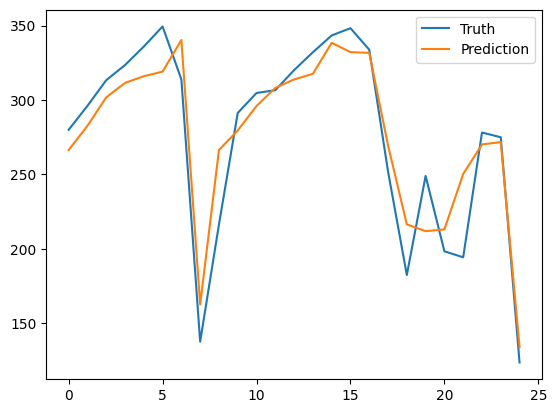

In [68]:
plt.plot(get_cA(y_test_wave, num_level))
plt.plot(preds_wave_cA)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [69]:
preds_wave_cD = predict_all(model_cD, get_cD(X_test_wave, 1, num_level))
print(preds_wave_cD)

[49.138226, 27.675455, -8.216026, 11.988641, 6.776995, -34.683617, 20.809156, -21.027277, 6.8488097, 15.065265, -14.589758, -4.7587905, -4.188103, 15.041537, 12.738151, -21.602331, -9.411701, -8.510395, 4.471598, -22.002302, 66.10641, -24.411856, -15.336147, 21.361, -7.0966845]


In [70]:
for i in range(len(get_cD(y_test_wave, 1, num_level))):
	print(get_cD(y_test_wave, 1, num_level)[i],"; ", preds_wave_cD[i])

-4.775482 ;  49.138226
-4.739319 ;  27.675455
-5.2414093 ;  -8.216026
-3.0566254 ;  11.988641
-3.4205627 ;  6.776995
-2.660736 ;  -34.683617
43.976776 ;  20.809156
32.312656 ;  -21.027277
-17.461296 ;  6.8488097
-3.435135 ;  15.065265
-2.6983337 ;  -14.589758
-3.684723 ;  -4.7587905
-3.7243347 ;  -4.188103
-2.8814545 ;  15.041537
-0.7063904 ;  12.738151
-7.5455475 ;  -21.602331
-12.508728 ;  -9.411701
-8.325478 ;  -8.510395
-22.733925 ;  4.471598
-10.749054 ;  -22.002302
67.1389 ;  66.10641
-78.78231 ;  -24.411856
-4.266693 ;  -15.336147
16.088806 ;  21.361
-55.95053 ;  -7.0966845


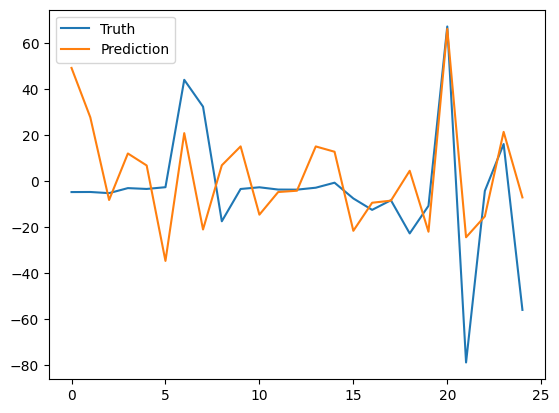

In [71]:
plt.plot(get_cD(y_test_wave, 1, num_level))
plt.plot(preds_wave_cD)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [115]:
model_cA.evaluate(get_cA(X_test_wave, num_level), get_cA(y_test_wave, num_level))

1/1 [==============================] - 0s 23ms/step - loss: 515.9401 - mse: 515.9401 - mae: 17.9518 - rmse: 22.7143 - rmspe: 0.1052 - mape: 7.6195


[515.9401245117188,
 515.9401245117188,
 17.95181655883789,
 22.71431541442871,
 0.1052214503288269,
 7.6195197105407715]

In [116]:
y_test_wave_cA_cumsum = np.cumsum(get_cA(y_test_wave, num_level))
y_test_wave_cA_cumsum

array([ 279.93488,  575.9787 ,  889.2418 , 1212.6614 , 1548.5183 ,
       1897.866  , 2211.71   , 2349.3816 , 2565.6897 , 2856.9526 ,
       3161.6335 , 3468.1821 , 3788.1995 , 4120.246  , 4463.5557 ,
       4811.7583 , 5145.5254 , 5397.4663 , 5579.8906 , 5828.862  ,
       6027.2246 , 6221.5483 , 6499.663  , 6774.6377 , 6898.329  ],
      dtype=float32)

In [117]:
preds_wave_cA_cumsum = np.cumsum(preds_wave_cA)
preds_wave_cA_cumsum

array([ 266.35754,  548.9675 ,  850.69836, 1162.1556 , 1478.0831 ,
       1797.1311 , 2137.3792 , 2300.0203 , 2566.3823 , 2845.9163 ,
       3141.854  , 3449.9563 , 3763.7324 , 4081.2795 , 4419.6426 ,
       4751.75   , 5083.3745 , 5352.737  , 5569.148  , 5781.031  ,
       5994.0957 , 6244.39   , 6514.497  , 6786.1973 , 6920.117  ],
      dtype=float32)

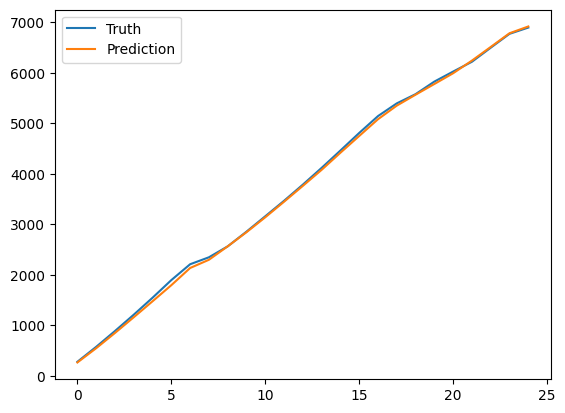

In [118]:
plt.plot(y_test_wave_cA_cumsum)
plt.plot(preds_wave_cA_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [119]:
rmspe_score_wave_cA_cumsum = rmspe(y_test_wave_cA_cumsum, preds_wave_cA_cumsum)
rmspe_score_wave_cA_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=0.024847334>

In [120]:
mape_score_wave_cA_cumsum = tf.keras.metrics.mean_absolute_percentage_error(y_test_wave_cA_cumsum, preds_wave_cA_cumsum)
mape_score_wave_cA_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=1.7370157>

## Evaluate model

### Normally

In [227]:
preds_wave_whole = (np.array(preds_wave_cA), np.array(preds_wave_cD))

In [228]:
preds = (pywt.waverec(preds_wave_whole, wavelet))

In [229]:
preds

array([223.08919 , 153.59724 , 219.40492 , 180.26591 , 207.54634 ,
       219.16554 , 228.71077 , 211.75627 , 228.18652 , 218.60242 ,
       201.076   , 250.12605 , 255.30598 , 225.8774  , 100.136055,
       129.87311 , 193.18933 , 183.50366 , 208.31314 , 187.00763 ,
       198.94305 , 219.57608 , 214.49625 , 221.2262  , 218.91174 ,
       224.83463 , 235.17567 , 213.90373 , 248.26585 , 230.25139 ,
       219.56035 , 250.11067 , 227.83873 , 241.14888 , 184.45    ,
       196.48552 , 156.1878  , 149.86401 , 134.2657  , 165.38167 ,
       197.40378 , 103.91519 , 159.72307 , 194.24666 , 180.15031 ,
       201.83891 , 207.22546 , 177.01645 ,  89.677704,  99.71393 ],
      dtype=float32)

In [230]:
for i in range(len(y_test)):
	print(y_test[i],"; ", preds[i])

194.56708 ;  223.08919
201.32062 ;  153.59724
205.9834 ;  219.40492
212.6858 ;  180.26591
217.80426 ;  207.54634
225.21674 ;  219.16554
226.53076 ;  228.71077
230.8535 ;  211.75627
235.06805 ;  228.18652
239.90547 ;  218.60242
245.14468 ;  201.076
248.90753 ;  250.12605
253.01741 ;  255.30598
190.82486 ;  225.8774
120.197 ;  100.136055
74.5 ;  129.87311
140.606 ;  193.18933
165.3 ;  183.50366
203.525 ;  208.31314
208.383 ;  187.00763
213.534 ;  198.94305
217.35 ;  219.57608
214.157 ;  214.49625
219.368 ;  221.2262
223.653 ;  218.91174
228.92 ;  224.83463
232.755 ;  235.17567
236.83 ;  213.90373
242.257 ;  248.26585
243.256 ;  230.25139
240.881 ;  219.56035
251.552 ;  250.11067
227.164 ;  227.83873
244.854 ;  241.14888
172.262 ;  184.45
184.036 ;  196.48552
112.918 ;  156.1878
145.06863 ;  149.86401
168.44862 ;  134.2657
183.65009 ;  165.38167
187.73802 ;  197.40378
92.78927 ;  103.91519
81.7 ;  159.72307
193.115 ;  194.24666
193.64 ;  180.15031
199.674 ;  201.83891
205.813 ;  207.22546

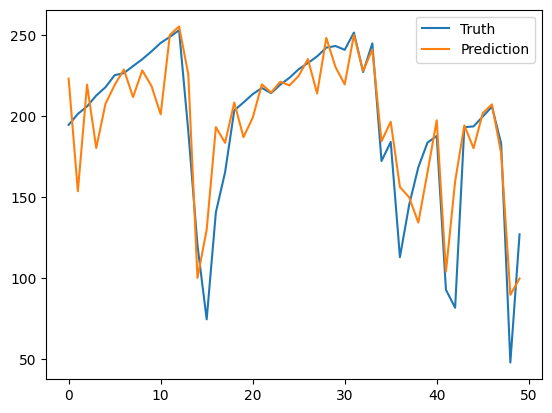

In [231]:
plt.plot(y_test)
plt.plot(preds)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [232]:
rmspe_score = rmspe(y_test, preds)
rmspe_score

<tf.Tensor: shape=(), dtype=float32, numpy=0.24127531>

In [233]:
mape_score = tf.keras.metrics.mean_absolute_percentage_error(y_test, preds)
mape_score

<tf.Tensor: shape=(), dtype=float32, numpy=12.811499>

In [234]:
y_test_cumsum = np.cumsum(y_test)
y_test_cumsum

array([ 194.56708,  395.8877 ,  601.8711 ,  814.5569 , 1032.3611 ,
       1257.5779 , 1484.1086 , 1714.9622 , 1950.0303 , 2189.9358 ,
       2435.0806 , 2683.988  , 2937.0054 , 3127.8303 , 3248.0273 ,
       3322.5273 , 3463.1333 , 3628.4333 , 3831.9583 , 4040.3413 ,
       4253.8755 , 4471.2256 , 4685.383  , 4904.751  , 5128.404  ,
       5357.3237 , 5590.0786 , 5826.9087 , 6069.1655 , 6312.4214 ,
       6553.3022 , 6804.8545 , 7032.0186 , 7276.8726 , 7449.135  ,
       7633.171  , 7746.089  , 7891.1577 , 8059.6064 , 8243.257  ,
       8430.995  , 8523.784  , 8605.484  , 8798.6    , 8992.239  ,
       9191.913  , 9397.727  , 9580.786  , 9628.687  , 9755.713  ],
      dtype=float32)

In [235]:
preds_cumsum = np.cumsum(preds)
preds_cumsum

array([ 223.08919,  376.68643,  596.0914 ,  776.3573 ,  983.9036 ,
       1203.0692 , 1431.78   , 1643.5363 , 1871.7228 , 2090.3252 ,
       2291.4011 , 2541.527  , 2796.833  , 3022.7104 , 3122.8464 ,
       3252.7195 , 3445.9087 , 3629.4124 , 3837.7256 , 4024.7332 ,
       4223.6763 , 4443.2524 , 4657.7485 , 4878.9746 , 5097.886  ,
       5322.7207 , 5557.8965 , 5771.8003 , 6020.066  , 6250.3174 ,
       6469.878  , 6719.989  , 6947.8276 , 7188.9766 , 7373.427  ,
       7569.912  , 7726.1    , 7875.964  , 8010.2295 , 8175.6113 ,
       8373.015  , 8476.93   , 8636.652  , 8830.899  , 9011.05   ,
       9212.889  , 9420.114  , 9597.131  , 9686.809  , 9786.522  ],
      dtype=float32)

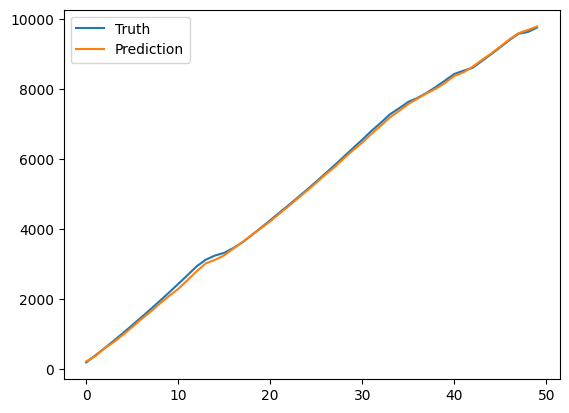

In [236]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [237]:
rmspe_score_cumsum = rmspe(y_test_cumsum, preds_cumsum)
rmspe_score_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=0.031662624>

In [238]:
mape_score_cumsum = tf.keras.metrics.mean_absolute_percentage_error(y_test_cumsum, preds_cumsum)
mape_score_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=1.9238657>

### cD replaced with zeroes

In [239]:
preds_wave_whole_zero = (np.array(preds_wave_cA), np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]))

In [240]:
preds_zero = (pywt.waverec(preds_wave_whole_zero, wavelet))

In [241]:
preds_zero

array([188.34322554, 188.34322554, 199.83541549, 199.83541549,
       213.35594107, 213.35594107, 220.2335299 , 220.2335299 ,
       223.39447071, 223.39447071, 225.60102884, 225.60102884,
       240.59170123, 240.59170123, 115.00459094, 115.00459094,
       188.34650558, 188.34650558, 197.66038456, 197.66038456,
       209.25956411, 209.25956411, 217.86122204, 217.86122204,
       221.87318122, 221.87318122, 224.53969971, 224.53969971,
       239.25862541, 239.25862541, 234.83551799, 234.83551799,
       234.49381157, 234.49381157, 190.46776119, 190.46776119,
       153.02590901, 153.02590901, 149.82368722, 149.82368722,
       150.65949227, 150.65949227, 176.98485892, 176.98485892,
       190.99461702, 190.99461702, 192.12096424, 192.12096424,
        94.69581437,  94.69581437])

In [242]:
for i in range(len(y_test)):
	print(y_test[i],"; ", preds_zero[i])

194.56708 ;  188.34322554392432
201.32062 ;  188.34322554392432
205.9834 ;  199.83541549393428
212.6858 ;  199.83541549393428
217.80426 ;  213.35594107314438
225.21674 ;  213.35594107314438
226.53076 ;  220.2335298994105
230.8535 ;  220.2335298994105
235.06805 ;  223.39447070797334
239.90547 ;  223.39447070797334
245.14468 ;  225.60102883796142
248.90753 ;  225.60102883796142
253.01741 ;  240.59170123079082
190.82486 ;  240.59170123079082
120.197 ;  115.00459094252847
74.5 ;  115.00459094252847
140.606 ;  188.34650558026283
165.3 ;  188.34650558026283
203.525 ;  197.66038455533152
208.383 ;  197.66038455533152
213.534 ;  209.25956411169898
217.35 ;  209.25956411169898
214.157 ;  217.86122203839543
219.368 ;  217.86122203839543
223.653 ;  221.87318122249698
228.92 ;  221.87318122249698
232.755 ;  224.53969971140205
236.83 ;  224.53969971140205
242.257 ;  239.258625409423
243.256 ;  239.258625409423
240.881 ;  234.83551798612626
251.552 ;  234.83551798612626
227.164 ;  234.49381156888722

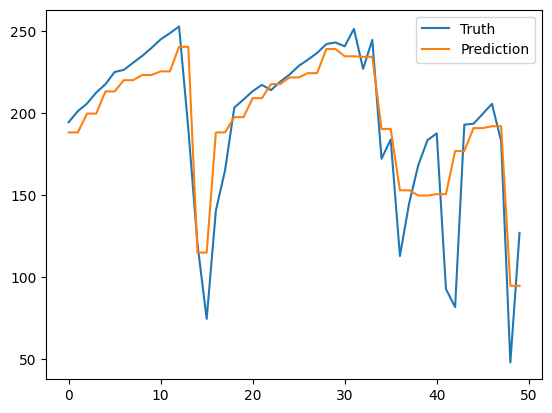

In [243]:
plt.plot(y_test)
plt.plot(preds_zero)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [244]:
rmspe_score_zero = rmspe(y_test, preds_zero)
rmspe_score_zero

<tf.Tensor: shape=(), dtype=float64, numpy=0.26723113065813076>

In [245]:
mape_score_zero = tf.keras.metrics.mean_absolute_percentage_error(y_test, preds_zero)
mape_score_zero

<tf.Tensor: shape=(), dtype=float64, numpy=13.609557925194544>

In [246]:
y_test_cumsum = np.cumsum(y_test)
y_test_cumsum

array([ 194.56708,  395.8877 ,  601.8711 ,  814.5569 , 1032.3611 ,
       1257.5779 , 1484.1086 , 1714.9622 , 1950.0303 , 2189.9358 ,
       2435.0806 , 2683.988  , 2937.0054 , 3127.8303 , 3248.0273 ,
       3322.5273 , 3463.1333 , 3628.4333 , 3831.9583 , 4040.3413 ,
       4253.8755 , 4471.2256 , 4685.383  , 4904.751  , 5128.404  ,
       5357.3237 , 5590.0786 , 5826.9087 , 6069.1655 , 6312.4214 ,
       6553.3022 , 6804.8545 , 7032.0186 , 7276.8726 , 7449.135  ,
       7633.171  , 7746.089  , 7891.1577 , 8059.6064 , 8243.257  ,
       8430.995  , 8523.784  , 8605.484  , 8798.6    , 8992.239  ,
       9191.913  , 9397.727  , 9580.786  , 9628.687  , 9755.713  ],
      dtype=float32)

In [247]:
preds_cumsum_zero = np.cumsum(preds_zero)
preds_cumsum_zero

array([ 188.34322554,  376.68645109,  576.52186658,  776.35728208,
        989.71322315, 1203.06916422, 1423.30269412, 1643.53622402,
       1866.93069473, 2090.32516544, 2315.92619427, 2541.52722311,
       2782.11892434, 3022.71062557, 3137.71521652, 3252.71980746,
       3441.06631304, 3629.41281862, 3827.07320318, 4024.73358773,
       4233.99315184, 4443.25271595, 4661.11393799, 4878.97516003,
       5100.84834125, 5322.72152248, 5547.26122219, 5771.8009219 ,
       6011.05954731, 6250.31817272, 6485.1536907 , 6719.98920869,
       6954.48302026, 7188.97683183, 7379.44459301, 7569.9123542 ,
       7722.93826321, 7875.96417222, 8025.78785944, 8175.61154666,
       8326.27103893, 8476.9305312 , 8653.91539011, 8830.90024903,
       9021.89486606, 9212.88948308, 9405.01044732, 9597.13141156,
       9691.82722593, 9786.52304029])

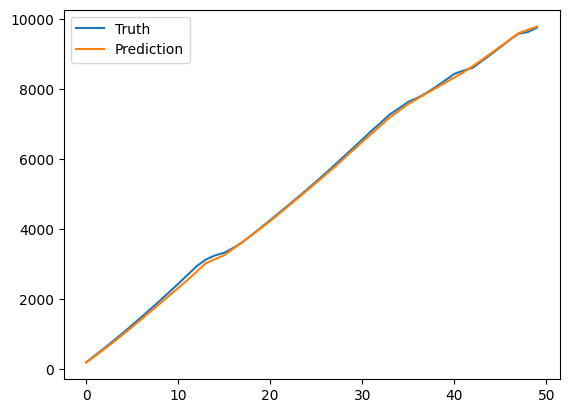

In [248]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum_zero)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [249]:
rmspe_score_cumsum_zero = rmspe(y_test_cumsum, preds_cumsum_zero)
rmspe_score_cumsum_zero

<tf.Tensor: shape=(), dtype=float64, numpy=0.024745279441423563>

In [250]:
mape_score_cumsum_zero = tf.keras.metrics.mean_absolute_percentage_error(y_test_cumsum, preds_cumsum_zero)
mape_score_cumsum_zero

<tf.Tensor: shape=(), dtype=float64, numpy=1.751281697895214>

## Compare

In [251]:
print(rmspe_score, rmspe_score_zero)

tf.Tensor(0.24127531, shape=(), dtype=float32) tf.Tensor(0.26723113065813076, shape=(), dtype=float64)


In [253]:
print(mape_score, mape_score_zero)

tf.Tensor(12.811499, shape=(), dtype=float32) tf.Tensor(13.609557925194544, shape=(), dtype=float64)


In [254]:
print(rmspe_score_cumsum, rmspe_score_cumsum_zero)

tf.Tensor(0.031662624, shape=(), dtype=float32) tf.Tensor(0.024745279441423563, shape=(), dtype=float64)


In [255]:
print(mape_score_cumsum, mape_score_cumsum_zero)

tf.Tensor(1.9238657, shape=(), dtype=float32) tf.Tensor(1.751281697895214, shape=(), dtype=float64)


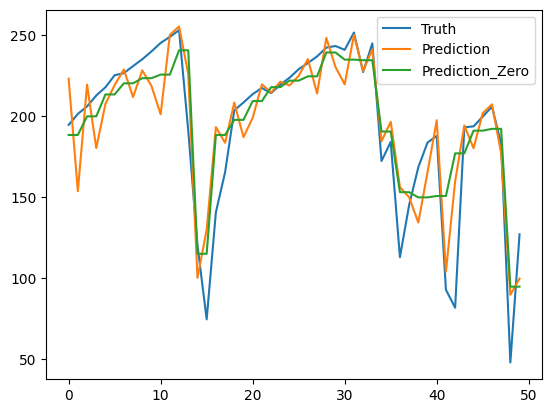

In [256]:
plt.plot(y_test)
plt.plot(preds)
plt.plot(preds_zero)
plt.legend(['Truth', 'Prediction', 'Prediction_Zero'])
plt.show()

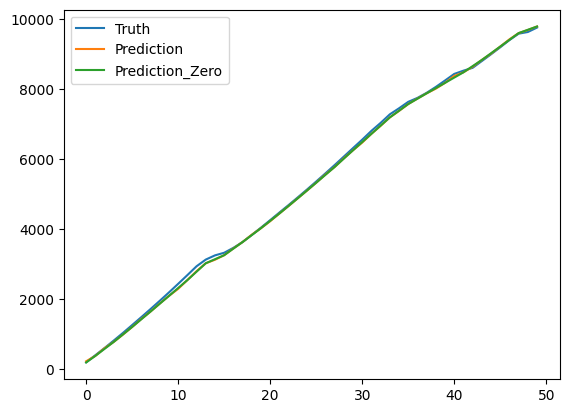

In [257]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum)
plt.plot(preds_cumsum_zero)
plt.legend(['Truth', 'Prediction', 'Prediction_Zero'])
plt.show()

# ---------------------------------------------------------------------------------------------------------------------------------------------

In [252]:
model.save('cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf')

NameError: ignored

In [ ]:
!zip -r /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf".zip /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf"

In [ ]:
loaded_1 = tf.keras.models.load_model("cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf")

In [ ]:
loaded_1.evaluate(X_test, y_test)

# data -> frequency

In [ ]:
def get_wave(data, mode, num_level):
  wave = []
  for i in range(len(data)):
    wave.append(pywt.wavedec([data[i]], mode, level = num_level))
  return np.array(wave).T[0]

In [ ]:
mode = 'haar'

## 1 levels

In [ ]:
num_level = 1

In [ ]:
lc_wave1 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave1

In [ ]:
# Plot cA
plt.plot(lc_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave1[1])
plt.show()

## 2 levels

In [ ]:
num_level = 2

In [ ]:
lc_wave2 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave2

In [ ]:
# Plot cA
plt.plot(lc_wave2[0])
plt.show()

In [ ]:
# Plot cD1
plt.plot(lc_wave2[1])
plt.show()

In [ ]:
# Plot cD2
plt.plot(lc_wave2[2])
plt.show()

## 3 levels

In [ ]:
num_level = 3

In [ ]:
lc_wave3 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave3

In [ ]:
# Plot cA
plt.plot(lc_wave3[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave3[1])
plt.show()

In [ ]:
plt.plot(lc_wave1[0])
plt.plot(lc_wave2[0])
plt.plot(lc_wave3[0])
plt.legend(['A1', 'A2', 'A3'])
plt.show()

# **Temperature**

# data -> frequency

## level 1

In [ ]:
num_level = 1

In [ ]:
temp_wave1 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave1

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave1[1])
plt.show()

## level 2

In [ ]:
num_level = 2

In [ ]:
temp_wave2 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave2

In [ ]:
# Plot cA
plt.plot(temp_wave2[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave2[1])
plt.show()

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.plot(temp_wave2[0])
plt.show()